✅ Custom Dataset Created (shape): (100, 2)


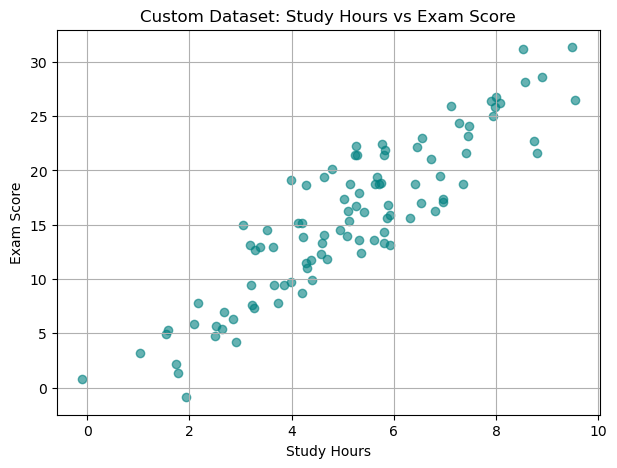


Mean after standardization: [-1.69864123e-16 -3.03090886e-16]
Std after standardization: [1. 1.]

Covariance Matrix:
 [[1.01010101 0.90977295]
 [0.90977295 1.01010101]]

Eigenvalues: [1.91987396 0.10032806]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Explained Variance Ratio: [0.95033761 0.04966239]

Projected Data Shape: (100, 1)


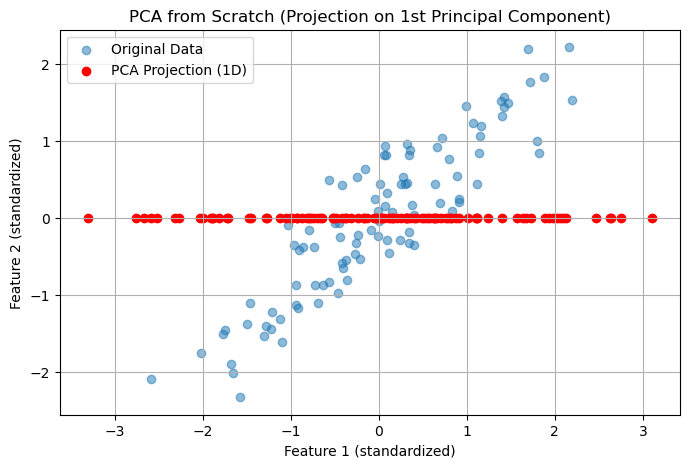

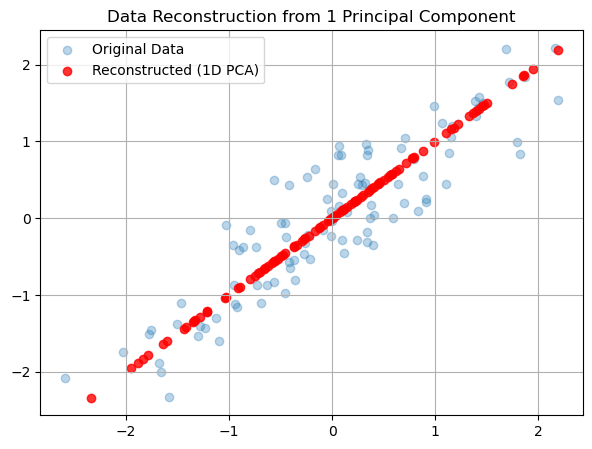

In [2]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
n_samples = 100

study_hours = np.random.normal(5, 2, n_samples)        
exam_scores = 3 * study_hours + np.random.normal(0, 3, n_samples) 


data = np.column_stack((study_hours, exam_scores))
print("✅ Custom Dataset Created (shape):", data.shape)


plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, color='teal')
plt.title("Custom Dataset: Study Hours vs Exam Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()


mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
X = (data - mean) / std
print("\nMean after standardization:", np.mean(X, axis=0))
print("Std after standardization:", np.std(X, axis=0))


cov_matrix = np.cov(X.T)
print("\nCovariance Matrix:\n", cov_matrix)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

print("\nEigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("\nExplained Variance Ratio:", explained_variance_ratio)

k = 1
W = eigenvectors[:, :k]


X_pca = X.dot(W)
print("\nProjected Data Shape:", X_pca.shape)


plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.scatter(X_pca, np.zeros_like(X_pca), color='red', label='PCA Projection (1D)')
plt.title("PCA from Scratch (Projection on 1st Principal Component)")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.grid(True)
plt.show()

X_reconstructed = X_pca.dot(W.T)
plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], alpha=0.3, label="Original Data")
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], alpha=0.8, color='red', label="Reconstructed (1D PCA)")
plt.title("Data Reconstruction from 1 Principal Component")
plt.legend()
plt.grid(True)
plt.show()
